In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

: 

In [2]:
pip install bnltk

  Using cached bnltk-0.7.8-py3-none-any.whl.metadata (5.1 kB)
  Using cached black-24.10.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_28_x86_64.whl.metadata (79 kB)
  Using cached keras-3.6.0-py3-none-any.whl.metadata (5.8 kB)
  Using cached numpy-2.0.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (13 kB)
  Using cached tensorflow-2.18.0-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached click-8.2.1-py3-none-any.whl.metadata (2.5 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pathspec-0.12.1-py3-none-any.whl.metadata (21 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached rich-14.1.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-

In [ ]:
from sklearn.model_selection import train_test_split
from bnltk.tokenize import Tokenizers
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
import collections
import nltk
import pandas as pd
import codecs


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
INPUT_FILE = "./ecommerce_dataset.txt"
stopwords_list = "./stopwords.txt"
import string
counter = collections.Counter()
tokenizer = Tokenizers()
maxlen =0
xs, ys = [], []
bangla_stopwords = codecs.open(stopwords_list,'r',encoding='utf-8').read().split()

fin = codecs.open(INPUT_FILE,'r',encoding='utf-16')
punctuation_marks = set(string.punctuation)
for line in fin:
  _, sent=line.strip().split("\t")
  print("Lable:",_)
  print("Sentence: ",sent)

  #tokenization
  words = tokenizer.bn_word_tokenizer(sent)
  print("After Tokenizing: ",words)

  #Exclude punctuation marks
  wordsExcludingPunctuation = [word for word in words if word not in punctuation_marks]
  print("After excluding puntuation: ",wordsExcludingPunctuation)

  #Exclude Stopwords
  wordsExcludingStopwords = [word for word in wordsExcludingPunctuation if word not in bangla_stopwords]
  print("After Excluding Stopwords: ", wordsExcludingStopwords)
  if len(wordsExcludingPunctuation)>maxlen:
    maxlen = len(wordsExcludingPunctuation)

  #update word frequency counter
  for word in wordsExcludingStopwords:
      counter[word] += 1


  print("***************************************************************************************")


  ys.append(int(_))
  xs.append(' '.join(wordsExcludingStopwords))

fin.close()


Lable: 0
Sentence:  অনেকগুলা অরডার আছে একটু দেখবেন
After Tokenizing:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
After excluding puntuation:  ['অনেকগুলা', 'অরডার', 'আছে', 'একটু', 'দেখবেন']
After Excluding Stopwords:  ['অনেকগুলা', 'অরডার', 'একটু', 'দেখবেন']
***************************************************************************************
Lable: 1
Sentence:  ভালোবাসা রইল ইভ্যালির প্রতি
After Tokenizing:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
After excluding puntuation:  ['ভালোবাসা', 'রইল', 'ইভ্যালির', 'প্রতি']
After Excluding Stopwords:  ['ভালোবাসা', 'রইল', 'ইভ্যালির']
***************************************************************************************
Lable: 0
Sentence:  আগের প্রডাক্ট ক্লিয়ার করেন তারাতাড়ি
After Tokenizing:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
After excluding puntuation:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'করেন', 'তারাতাড়ি']
After Excluding Stopwords:  ['আগের', 'প্রডাক্ট', 'ক্লিয়ার', 'তারাতাড়ি']
*********************************************

In [22]:
#train and test data creation from main dataset
Xtrain, Xtest, Ytrain, Ytest = train_test_split(xs, ys, test_size=0.25, random_state = 0)
Xtrain

['খুবি বাজে কোয়ালিটি ভাই ডিজাইন ভালো লাগছিল কিনছিলাম দাম দিয়েও । বাট পুরাই বাজে',
 'আলহামদুলিল্লাহ যেটা ওর্ডার করছি পাইছি । অল্প দামে খুবই ভালো একটা প্রোডাক্ট',
 'মাসে ৫ ৬ ডেলিভারি ম্যান আসতো প্রডাক্ট ডেলিভারি এক এক বারও আসে না ডেলিভারি চার্জ বাড়ানোর অর্ডারই না',
 'ভালো লেগেছে',
 'এক আরেক ৷ চিটিং',
 'খারাপ অভিজ্ঞতা',
 'দুইটা নিয়েছি সুন্দর',
 'হাইলি রিকমেন্ডড',
 'রমজানের শার্ট দাম ৪৯৫ টাকা । ঈদের বেড়ে ৫৯৫ টাকা । সবচেয়ে বড় কথা এক সপ্তার কালার ।',
 'ধন্যবাদ ভাল মানের কাপড় ।',
 'স্নোবল ফেয়ারি লাইটস টা সত্যিই অসম্ভব সুন্দর । কোয়ালিটি ফুল । প্রতিটি লাইট ঠিক',
 'শুধু ধোঁকা বাজি',
 'পণ্যের দাম বেশি দেখিয়ে তারপরে ডিসকাউন্ট দেয়া । একটা শুভঙ্করের ফাঁকি',
 'বছর পাব না',
 'কোয়ালিটি এভারেজ সেলাইগুলো দুর্বল । ব্যাগটা সুন্দর বাচ্চাদের সাথে মানানসই । ভারী না বহন বুদ্ধিমানের ।',
 'ওয়েবসাইট বন্ধ',
 'জিনিস পাব',
 'খারাপ মানের খাবার',
 'জঘন্য বার্গার সত্যি টাকাই লস',
 'দোকানের পরিষেবা অত্যন্ত সন্তুষ্ট',
 'আলহামদুলিল্লাহ প্রোডাক্ট ভাল ছিলাম ঠিক তেমনই পেয়েছি',
 'হতাশ কেনার সীমা সীমাবদ্ধ অর্ডার পারছি ন

In [6]:
#feature extraction....
#TFIDF vecto
#Xtrain.....>>>> Xtrain_tf (Vectorize)

tfidf = TfidfVectorizer(ngram_range=(1,3),use_idf=True,tokenizer= lambda x:x.split())

Xtrain_tf = tfidf.fit_transform(Xtrain)
print("n_sample: %d, n_features: %d" % Xtrain_tf.shape)

Xtest_tf = tfidf.transform(Xtest)
print("n_sample: %d, n_features: %d" % Xtest_tf.shape)


n_sample: 1223, n_features: 13854
n_sample: 408, n_features: 13854


/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Logistic regression

[[161  43]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.94      0.79      0.86       204
           1       0.82      0.95      0.88       204

    accuracy                           0.87       408
   macro avg       0.88      0.87      0.87       408
weighted avg       0.88      0.87      0.87       408



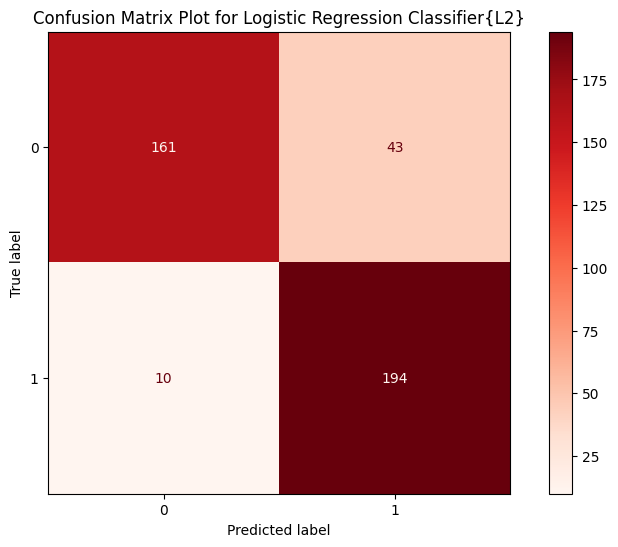

In [7]:
from sklearn.linear_model import LogisticRegression
LRClassification = LogisticRegression()
LRClassification.fit(Xtrain_tf, Ytrain)
y_pred = LRClassification.predict(Xtest_tf)
print(confusion_matrix(Ytest,y_pred))
print(classification_report(Ytest,y_pred))
cm= confusion_matrix(Ytest,y_pred)

#create a confusion Matrix Display object
matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

#plot the confusion matrix with color map
matrix.plot(cmap=plt.cm.Reds)

#costomize the plot
matrix.ax_.set_title('Confusion Matrix Plot for Logistic Regression Classifier{L2}', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

#show the plot
plt.show()

In [41]:
fprLR, tprLR, thesholdsLR = metrics.roc_curve(Ytest, y_pred)

[[173  31]
 [ 40 164]]
              precision    recall  f1-score   support

           0       0.81      0.85      0.83       204
           1       0.84      0.80      0.82       204

    accuracy                           0.83       408
   macro avg       0.83      0.83      0.83       408
weighted avg       0.83      0.83      0.83       408



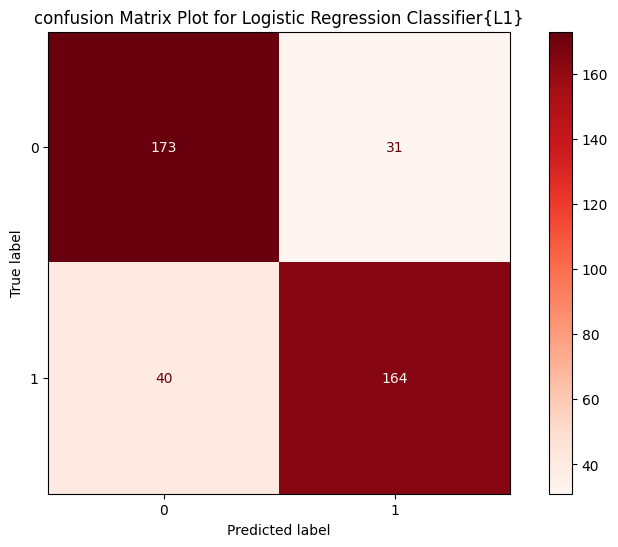

In [9]:
from sklearn.linear_model import LogisticRegression
LRClassification2 = LogisticRegression(penalty='l1', solver='liblinear')
LRClassification2.fit(Xtrain_tf, Ytrain)
y_pred2 = LRClassification2.predict(Xtest_tf)
print(confusion_matrix(Ytest,y_pred2))
print(classification_report(Ytest,y_pred2))
cm = confusion_matrix(Ytest,y_pred2)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('confusion Matrix Plot for Logistic Regression Classifier{L1}', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

plt.show()

In [42]:
fprLR2, tprLR2, thesholdsLR2 = metrics.roc_curve(Ytest, y_pred2)

SVM

[[181  23]
 [ 18 186]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90       204
           1       0.89      0.91      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



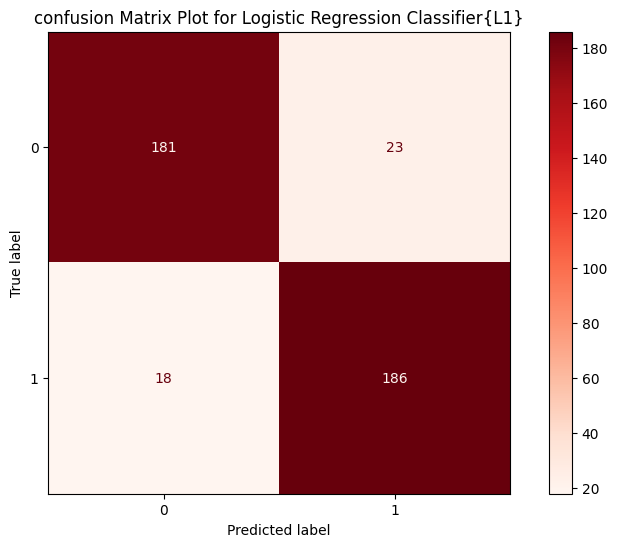

In [11]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
clf.fit(Xtrain_tf, Ytrain)
y_pred3 = clf.predict(Xtest_tf)
print(confusion_matrix(Ytest,y_pred3))
print(classification_report(Ytest,y_pred3))
cm = confusion_matrix(Ytest,y_pred3)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('confusion Matrix Plot for Logistic Regression Classifier{L1}', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

plt.show()

In [43]:
fprLR3, tprLR3, thesholdsLR3 = metrics.roc_curve(Ytest, y_pred3)

**Random Forest Classifier**

[[142  62]
 [ 10 194]]
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       204
           1       0.76      0.95      0.84       204

    accuracy                           0.82       408
   macro avg       0.85      0.82      0.82       408
weighted avg       0.85      0.82      0.82       408



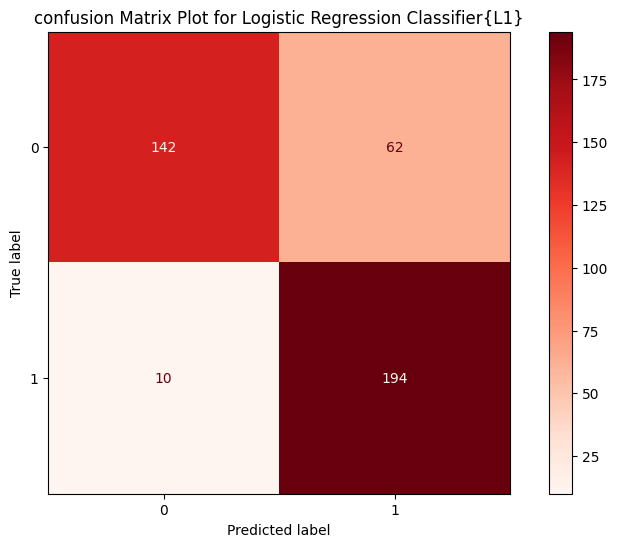

In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=0)
rf_classifier.fit(Xtrain_tf, Ytrain)
y_pred4 = rf_classifier.predict(Xtest_tf)
print(confusion_matrix(Ytest, y_pred4))
print(classification_report(Ytest, y_pred4))
cm = confusion_matrix(Ytest, y_pred4)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('confusion Matrix Plot for Logistic Regression Classifier{L1}', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

plt.show()


In [44]:
fprRF, tprRF, thresholdsRF = metrics.roc_curve(Ytest, y_pred4)

**Stochastic Gradient descent**

[[175  29]
 [ 12 192]]
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       204
           1       0.87      0.94      0.90       204

    accuracy                           0.90       408
   macro avg       0.90      0.90      0.90       408
weighted avg       0.90      0.90      0.90       408



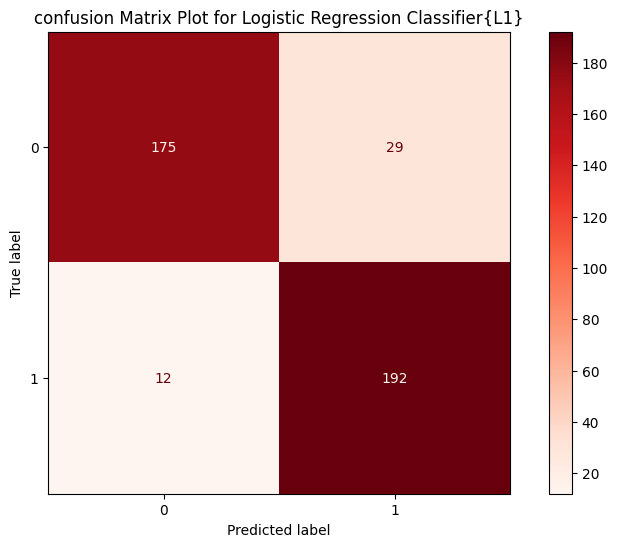

In [19]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss='log_loss', penalty='l2',max_iter=10, random_state=0)
sgd_classifier.fit(Xtrain_tf, Ytrain)
y_pred5 = sgd_classifier.predict(Xtest_tf)

print(confusion_matrix(Ytest, y_pred5))
print(classification_report(Ytest, y_pred5))
cm = confusion_matrix(Ytest, y_pred5)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('confusion Matrix Plot for Logistic Regression Classifier{L1}', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

plt.show()

In [45]:
fprSGR, tprSGR, thresholdsSGR = metrics.roc_curve(Ytest, y_pred5)

Random search(RS_CV)

[[179  25]
 [ 14 190]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       204
           1       0.88      0.93      0.91       204

    accuracy                           0.90       408
   macro avg       0.91      0.90      0.90       408
weighted avg       0.91      0.90      0.90       408



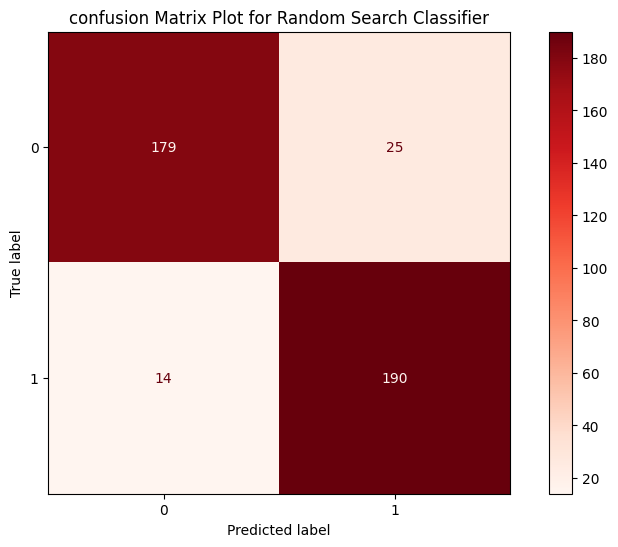

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy import stats
svm_clf = svm.SVC(probability=True, random_state=1)
avc = make_scorer(accuracy_score)

rand_list = {"C":stats.uniform(2,10), # Corrected parameter name to 'C'
             "gamma": stats.uniform(0.1,1),
             'kernel': ['rbf']
             }
rand_search = RandomizedSearchCV(svm_clf,param_distributions=rand_list, n_iter=20,n_jobs=4,cv=3,random_state=2017,scoring=avc)
rand_search.fit(Xtrain_tf, Ytrain)
rand_search.cv_results_
rand_predictions = rand_search.predict(Xtest_tf)
print(confusion_matrix(Ytest, rand_predictions))
print(classification_report(Ytest, rand_predictions))

cm = confusion_matrix(Ytest, rand_predictions)

matrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])

matrix.plot(cmap=plt.cm.Reds)

matrix.ax_.set_title('confusion Matrix Plot for Random Search Classifier', color='black')
plt.xlabel('Predicted label', color='black')
plt.ylabel('True label', color='black')
plt.gcf().axes[0].tick_params(color='black')
plt.gcf().axes[1].tick_params(color='black')
plt.gcf().set_size_inches(10,6)

plt.show()

In [46]:
fprSVM_optimized, tprSVM_optimized, thresholdsSVM_optimized = metrics.roc_curve(Ytest, rand_predictions)

**ROC Curve**

<Figure size 640x480 with 0 Axes>

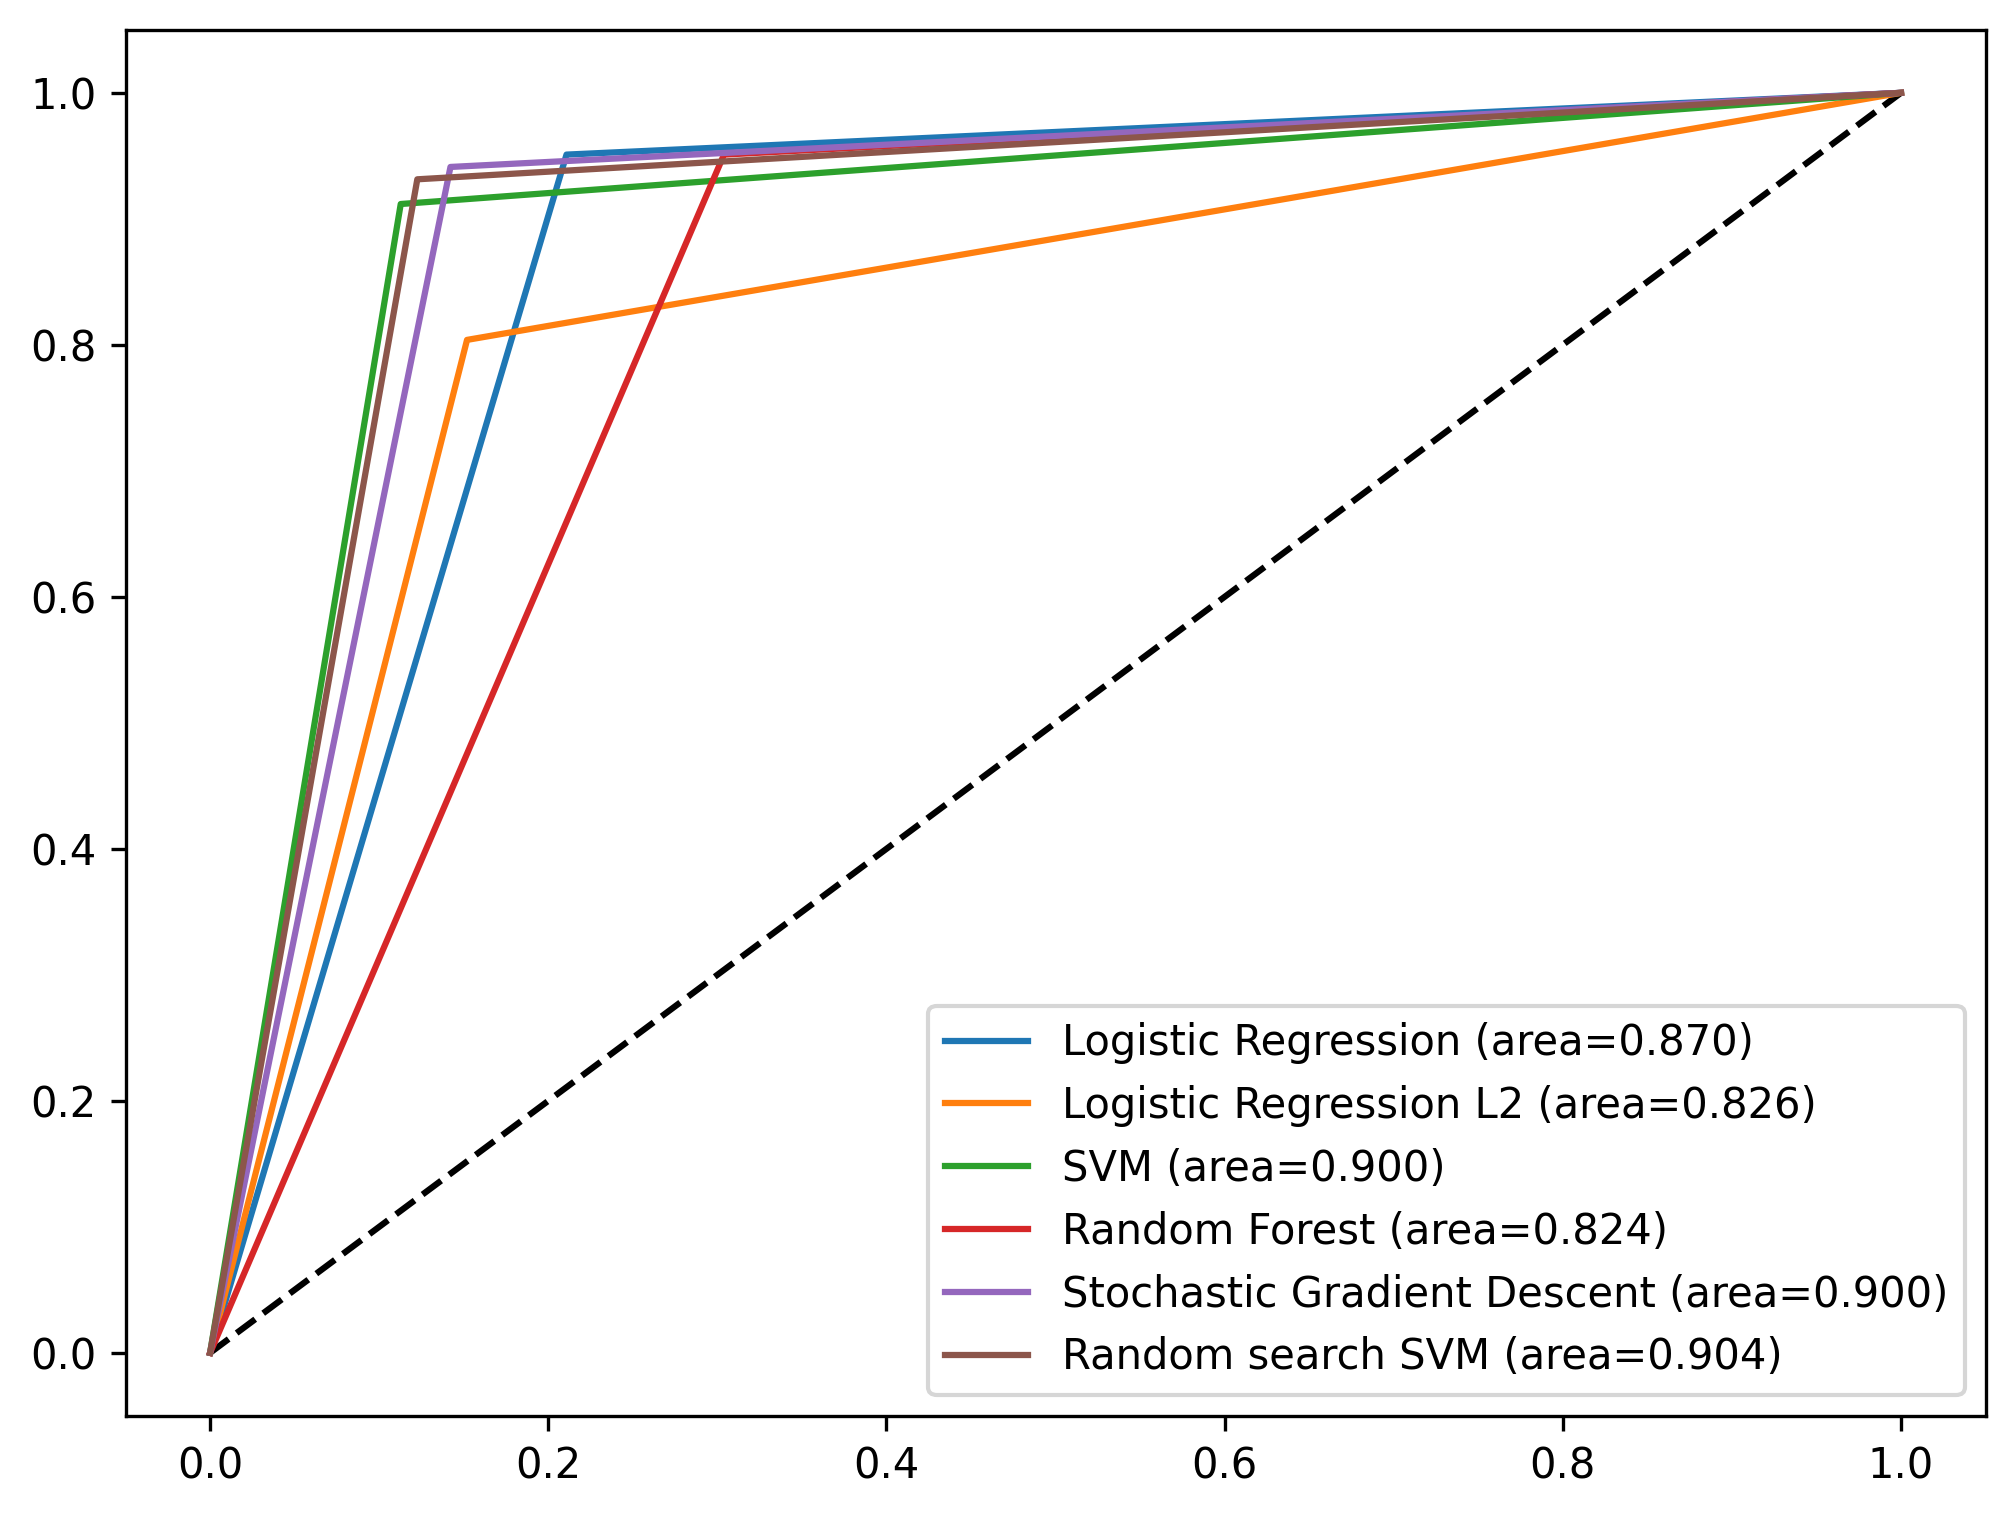

In [47]:
from matplotlib import pyplot as plt
from sklearn.metrics import auc, RocCurveDisplay
plt.figure(1)
plt.figure(figsize=(8,6), dpi=300)
plt.plot([0, 1], [0, 1], 'k--')

auc_LR = auc(fprLR, tprLR)
auc_LR2 = auc(fprLR2, tprLR2)
auc_SVM = auc(fprLR3, tprLR3)
auc_RF = auc(fprRF, tprRF)
auc_SGR = auc(fprSGR, tprSGR)
auc_SVM_optimized = auc(fprSVM_optimized, tprSVM_optimized) # Corrected variable name

plt.plot(fprLR, tprLR, label='Logistic Regression (area={:.3f})'.format(auc_LR))
plt.plot(fprLR2, tprLR2, label='Logistic Regression L2 (area={:.3f})'.format(auc_LR2))
plt.plot(fprLR3, tprLR3, label='SVM (area={:.3f})'.format(auc_SVM))
plt.plot(fprRF, tprRF, label='Random Forest (area={:.3f})'.format(auc_RF))
plt.plot(fprSGR, tprSGR, label='Stochastic Gradient Descent (area={:.3f})'.format(auc_SGR))
plt.plot(fprSVM_optimized, tprSVM_optimized, label='Random search SVM (area={:.3f})'.format(auc_SVM_optimized)) # Corrected variable name

plt.legend(loc = 'lower right')
plt.show()

Model save

In [48]:
!pip install cloudpickle

In [49]:
import cloudpickle

with open('/content/drive/MyDrive/Colab Notebooks/Sentiment7.ipynb', 'wb')as f:
  cloudpickle.dump(rand_search, f)

with open('/content/drive/MyDrive/Colab Notebooks/Sentiment7.ipynb', 'rb')as f:
  rand_search = cloudpickle.load(f)

In [56]:
def predict_sentiment(input_sentence):
  words = tokenizer.bn_word_tokenizer(input_sentence)
  wordsExcludingPunctuation = [word for word in words if word not in punctuation_marks]
  wordsExcludingStopwords = [word for word in wordsExcludingPunctuation if word not in bangla_stopwords]
  transformed_input = tfidf.transform([' '. join(wordsExcludingStopwords)])

  prediction = rand_search.predict(transformed_input)
  print(f"predicted sentiment: {'Positive' if prediction[0] == 1 else 'Negative'}")

input_sentence = "এই পণ্যটি কাজ করছে না ।"
predict_sentiment(input_sentence)

predicted sentiment: Positive
